**Data Analysis for Hate speech Dataset**

In [ ]:
#importing required libraries
import pandas as pd

In [ ]:
df=pd.read_csv('Annotations_Metadata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10944 non-null  object
 1   user_id       10944 non-null  int64 
 2   subforum_id   10944 non-null  int64 
 3   num_contexts  10944 non-null  int64 
 4   label         10944 non-null  object
dtypes: int64(3), object(2)
memory usage: 427.6+ KB


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

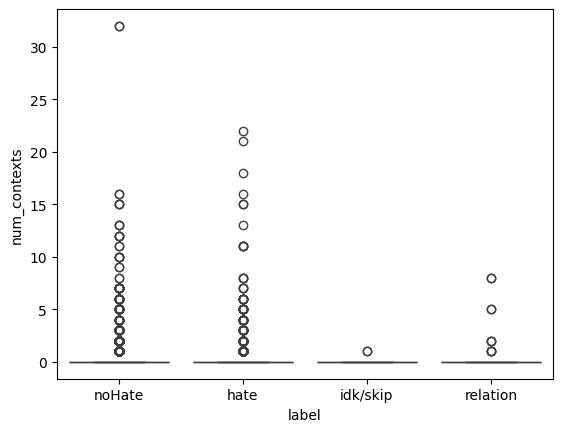

In [ ]:
sns.boxplot(x='label', y='num_contexts', data=df)
plt.show()

In [ ]:
labels_to_drop = ['idk/skip', 'relation']

# Drop rows where the 'label' column has values in labels_to_drop
dfnew = df.loc[~df['label'].isin(labels_to_drop)]


In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10776 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10776 non-null  object
 1   user_id       10776 non-null  int64 
 2   subforum_id   10776 non-null  int64 
 3   num_contexts  10776 non-null  int64 
 4   label         10776 non-null  object
dtypes: int64(3), object(2)
memory usage: 505.1+ KB


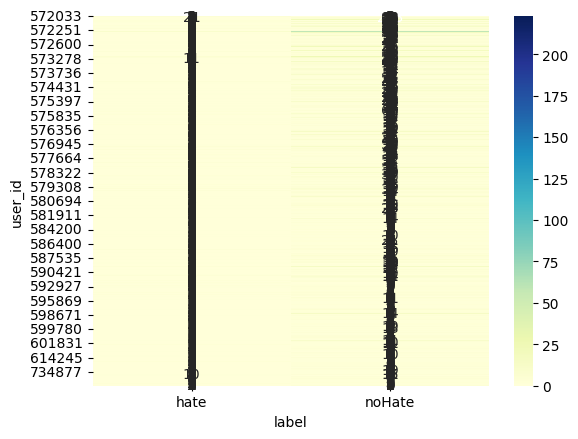

In [ ]:
pivot_table = dfnew.pivot_table(index='user_id', columns='label', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.show()

In [ ]:
unique_user_count = dfnew['user_id'].nunique()

print("Number of unique user_id values:", unique_user_count)


Number of unique user_id values: 2779


In [ ]:
unique_subforum_count = dfnew['subforum_id'].nunique()
print("Number of unique user_id values:", unique_subforum_count)

Number of unique user_id values: 21


In [ ]:

# Group by 'subforum_id' and count the number of comments in each subforum
subforum_comment_counts = dfnew.groupby('subforum_id').size().reset_index(name='comment_count')

# Display the resulting DataFrame
print(subforum_comment_counts)


    subforum_id  comment_count
0          1345            845
1          1346            609
2          1347            484
3          1348            598
4          1354            391
5          1359            708
6          1362            847
7          1363            748
8          1371            647
9          1375            424
10         1380            536
11         1381            756
12         1383            377
13         1387            567
14         1388            511
15         1391            640
16         1393            510
17         1394             26
18         1395            321
19         1396            162
20         1397             69


In [ ]:
subforum_counts = dfnew.groupby(['subforum_id', 'label']).size().reset_index(name='comment_count')

# Pivot the table to have 'subforum_id' as rows, 'label' as columns, and 'comment_count' as values
pivot_table = subforum_counts.pivot_table(index='subforum_id', columns='label', values='comment_count', fill_value=0)

# Rename the columns to 'hate_num' and 'noHate_num'
pivot_table.columns = ['noHate_num' if col == 'noHate' else 'hate_num' for col in pivot_table.columns]
pivot_table['total_count']=pivot_table['hate_num'] + pivot_table['noHate_num']

# Reset the index to make 'subforum_id' a column again
result_df = pivot_table.reset_index()
sorted_sub=result_df.sort_values(by='hate_num',ascending=False).reset_index()
sorted_sub.drop(columns='index',inplace=True)
# Display the resulting DataFrame
print(sorted_sub)

    subforum_id  hate_num  noHate_num  total_count
0          1345       150         695          845
1          1371       125         522          647
2          1391       113         527          640
3          1346       102         507          609
4          1388        79         432          511
5          1387        78         489          567
6          1363        65         683          748
7          1347        64         420          484
8          1362        64         783          847
9          1359        46         662          708
10         1393        45         465          510
11         1354        43         348          391
12         1348        42         556          598
13         1375        38         386          424
14         1383        38         339          377
15         1395        34         287          321
16         1380        25         511          536
17         1381        23         733          756
18         1396        16      

In [ ]:
# Filter the DataFrame to include only rows where the label is 'hate' or 'noHate'
filtered_df = df[df['label'].isin(['hate', 'noHate'])]

# Group by 'user_id' and 'label' and count the occurrences for each combination
user_label_counts = filtered_df.groupby(['user_id', 'label']).size().reset_index(name='comment_count')

# Pivot the table to have 'user_id' as rows, 'label' as columns, and 'comment_count' as values
pivot_table = user_label_counts.pivot_table(index='user_id', columns='label', values='comment_count', fill_value=0)

# Rename the columns
pivot_table.columns = ['hate_count', 'noHate_count']

# Add a new column 'total_count' which is the sum of 'noHate_count' and 'hate_count'
pivot_table['total_count'] = pivot_table['noHate_count'] + pivot_table['hate_count']

# Sort the DataFrame in descending order based on the total_count
sorted_df = pivot_table.sort_values(by='hate_count', ascending=False)

# Reset the index to make 'user_id' a column again
result_user_df = sorted_df.reset_index()

# Display the resulting DataFrame
print(result_user_df)


      user_id  hate_count  noHate_count  total_count
0      572043          21           223          244
1      573247          11            21           32
2      735180          10            15           25
3      591076           9             2           11
4      575397           9            14           23
...       ...         ...           ...          ...
2774   578058           0             4            4
2775   578055           0             3            3
2776   578037           0             3            3
2777   578027           0             1            1
2778   796449           0             3            3

[2779 rows x 4 columns]


In [ ]:
result_user_df['hate_to_noHate_ratio'] = (result_user_df['total_count'] - result_user_df['noHate_count']) / (result_user_df['noHate_count'] + 1)  # Adding 1 to avoid division by zero issues

# Sort the DataFrame in ascending order based on the hate to noHate ratio
sorted_userRatio_df = result_user_df.sort_values(by='hate_to_noHate_ratio', ascending=False).reset_index()
sorted_userRatio_df.drop(columns='index',inplace=True)


# Display the resulting DataFrame
print(sorted_userRatio_df)

      user_id  hate_count  noHate_count  total_count  hate_to_noHate_ratio
0      572087           8             0            8                   8.0
1      575082           3             0            3                   3.0
2      738851           3             0            3                   3.0
3      589430           3             0            3                   3.0
4      592532           3             0            3                   3.0
...       ...         ...           ...          ...                   ...
2774   597968           0             6            6                   0.0
2775   598171           0             4            4                   0.0
2776   597940           0             5            5                   0.0
2777   598408           0             2            2                   0.0
2778   796449           0             3            3                   0.0

[2779 rows x 5 columns]


In [ ]:
sorted_sub['hate_to_noHate_ratio'] = (sorted_sub['hate_num'] / (sorted_sub['noHate_num']))

# Sort the DataFrame in ascending order based on the hate to noHate ratio
sorted_sub = sorted_sub.sort_values(by='hate_to_noHate_ratio', ascending=False).reset_index()
sorted_sub.drop(columns='index',inplace=True)

# Display the resulting DataFrame
print(sorted_sub[['subforum_id','hate_num','noHate_num','total_count','hate_to_noHate_percent']])

    subforum_id  hate_num  noHate_num  total_count  hate_to_noHate_percent
0          1371       125         522          647               23.946360
1          1345       150         695          845               21.582734
2          1391       113         527          640               21.442125
3          1346       102         507          609               20.118343
4          1388        79         432          511               18.287037
5          1387        78         489          567               15.950920
6          1347        64         420          484               15.238095
7          1354        43         348          391               12.356322
8          1395        34         287          321               11.846690
9          1383        38         339          377               11.209440
10         1396        16         146          162               10.958904
11         1375        38         386          424                9.844560
12         1393        45